MOUNT THE DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


CHANGE THE DIRECTORY

In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks/ML_Assignment1'

/content/drive/MyDrive/Colab Notebooks/ML_Assignment1


IMPORTING LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

LOADING THE DATASET

In [ ]:
df = pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/ML_Assignment1/Dataset_Normalized/Heart_Disease.csv')

In [ ]:
print (df)

     att1  att2  att3  att4  att5  att6  att7  att8  att9  att10  ...  att16  \
0      -1     1    -1    -1    -1     1    -1     1     1     -1  ...     -1   
1      -1     1    -1    -1    -1     1    -1     1    -1      1  ...     -1   
2      -1     1    -1    -1    -1     1    -1     1    -1      1  ...     -1   
3       1    -1     1    -1    -1    -1    -1     1    -1     -1  ...     -1   
4       1    -1    -1    -1    -1     1    -1     1    -1     -1  ...     -1   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...    ...   
289    -1     1    -1     1    -1    -1    -1     1    -1      1  ...     -1   
290     1    -1    -1    -1     1    -1    -1     1    -1     -1  ...     -1   
291    -1     1    -1     1    -1    -1     1    -1    -1      1  ...     -1   
292     1    -1    -1    -1    -1     1    -1     1    -1      1  ...     -1   
293    -1     1    -1     1    -1    -1    -1     1    -1     -1  ...     -1   

     att17  att18  att19     att20     

DATA EXPLORATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    294 non-null    int64  
 1   att2    294 non-null    int64  
 2   att3    294 non-null    int64  
 3   att4    294 non-null    int64  
 4   att5    294 non-null    int64  
 5   att6    294 non-null    int64  
 6   att7    294 non-null    int64  
 7   att8    294 non-null    int64  
 8   att9    294 non-null    int64  
 9   att10   294 non-null    int64  
 10  att11   294 non-null    int64  
 11  att12   294 non-null    int64  
 12  att13   294 non-null    int64  
 13  att14   294 non-null    int64  
 14  att15   294 non-null    int64  
 15  att16   294 non-null    int64  
 16  att17   294 non-null    int64  
 17  att18   294 non-null    int64  
 18  att19   294 non-null    int64  
 19  att20   294 non-null    float64
 20  att21   294 non-null    float64
 21  att22   294 non-null    float64
 22  at

In [ ]:
df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att16,att17,att18,att19,att20,att21,att22,att23,att24,label
count,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,...,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,-0.448980,0.448980,-0.92517,-0.163265,-0.632653,-0.278912,-0.863946,0.863946,-0.959184,0.605442,...,-0.918367,-0.931973,-0.952381,0.884354,0.043502,-0.248452,-0.359657,0.057957,-0.765578,0.360544
std,0.895066,0.895066,0.38020,0.988264,0.775756,0.961954,0.504444,0.504444,0.283266,0.797246,...,0.396404,0.363146,0.305431,0.467613,0.411148,0.325860,0.250764,0.436101,0.363459,0.480977
min,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,-0.263158,-0.481481,-0.512548,-0.259259,-1.000000,0.000000
50%,-1.000000,1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,0.105263,-0.296296,-0.368726,0.074074,-1.000000,0.000000
75%,1.000000,1.000000,-1.00000,1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,0.368421,-0.111111,-0.258687,0.351852,-0.600000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


CHECKING MISSING VALUES

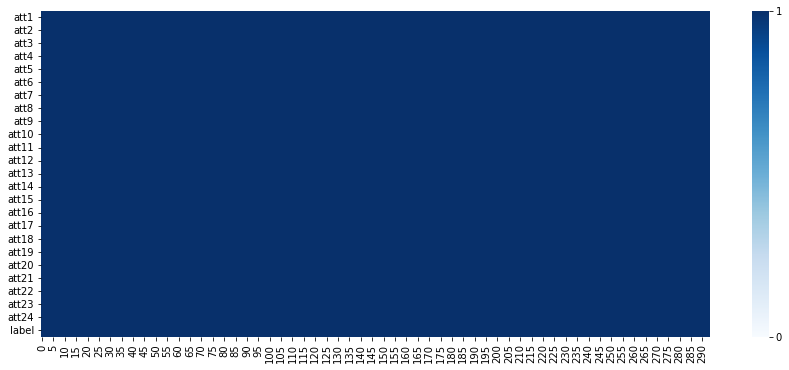

In [ ]:
import seaborn as sns
import matplotlib

select_df =  df.copy().sort_index()

select_df = select_df.T
select_df = pd.DataFrame(np.where(select_df.isna(), 0, 1), 
                                       columns = df.index, index=select_df.index)
select_df.columns = df.index
plt.figure(figsize=(15, 6))
matplotlib.rc('font', family='Hiragino Sans')
sns.heatmap(select_df, cmap='Blues', vmin=0, cbar_kws={'ticks': [0,1]})

CHECKING DUPLICATE VALUES

In [ ]:
df.duplicated().sum()

1

DELETING DUPLICATE VALUES

In [ ]:
df = df.drop_duplicates()

CHECKING NULL DATA

In [ ]:
df.isnull().sum()

att1     0
att2     0
att3     0
att4     0
att5     0
att6     0
att7     0
att8     0
att9     0
att10    0
att11    0
att12    0
att13    0
att14    0
att15    0
att16    0
att17    0
att18    0
att19    0
att20    0
att21    0
att22    0
att23    0
att24    0
label    0
dtype: int64

VIRTUALIZING THE OBJECTIVE CATEGORIES

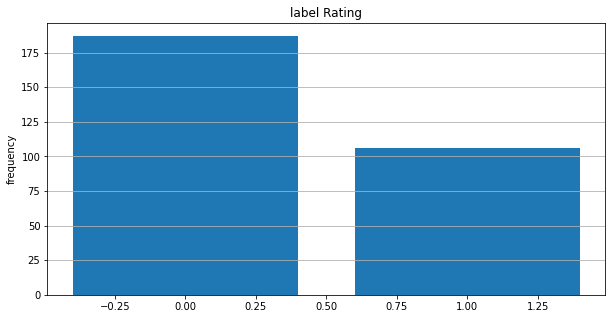

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig,ax = plt.subplots(figsize=(10,5))

label = df.sort_values(by = 'label')['label'].unique()
freq = df['label'].value_counts().sort_index()

plt.bar(label, freq, align='center')
plt.ylabel('frequency')
plt.title('label Rating')
plt.grid(axis = 'y')
plt.show()

VIRTUALIZING THE NUMERIC DATA

Text(0.5, 0.98, 'Visualization of Numeric Features')

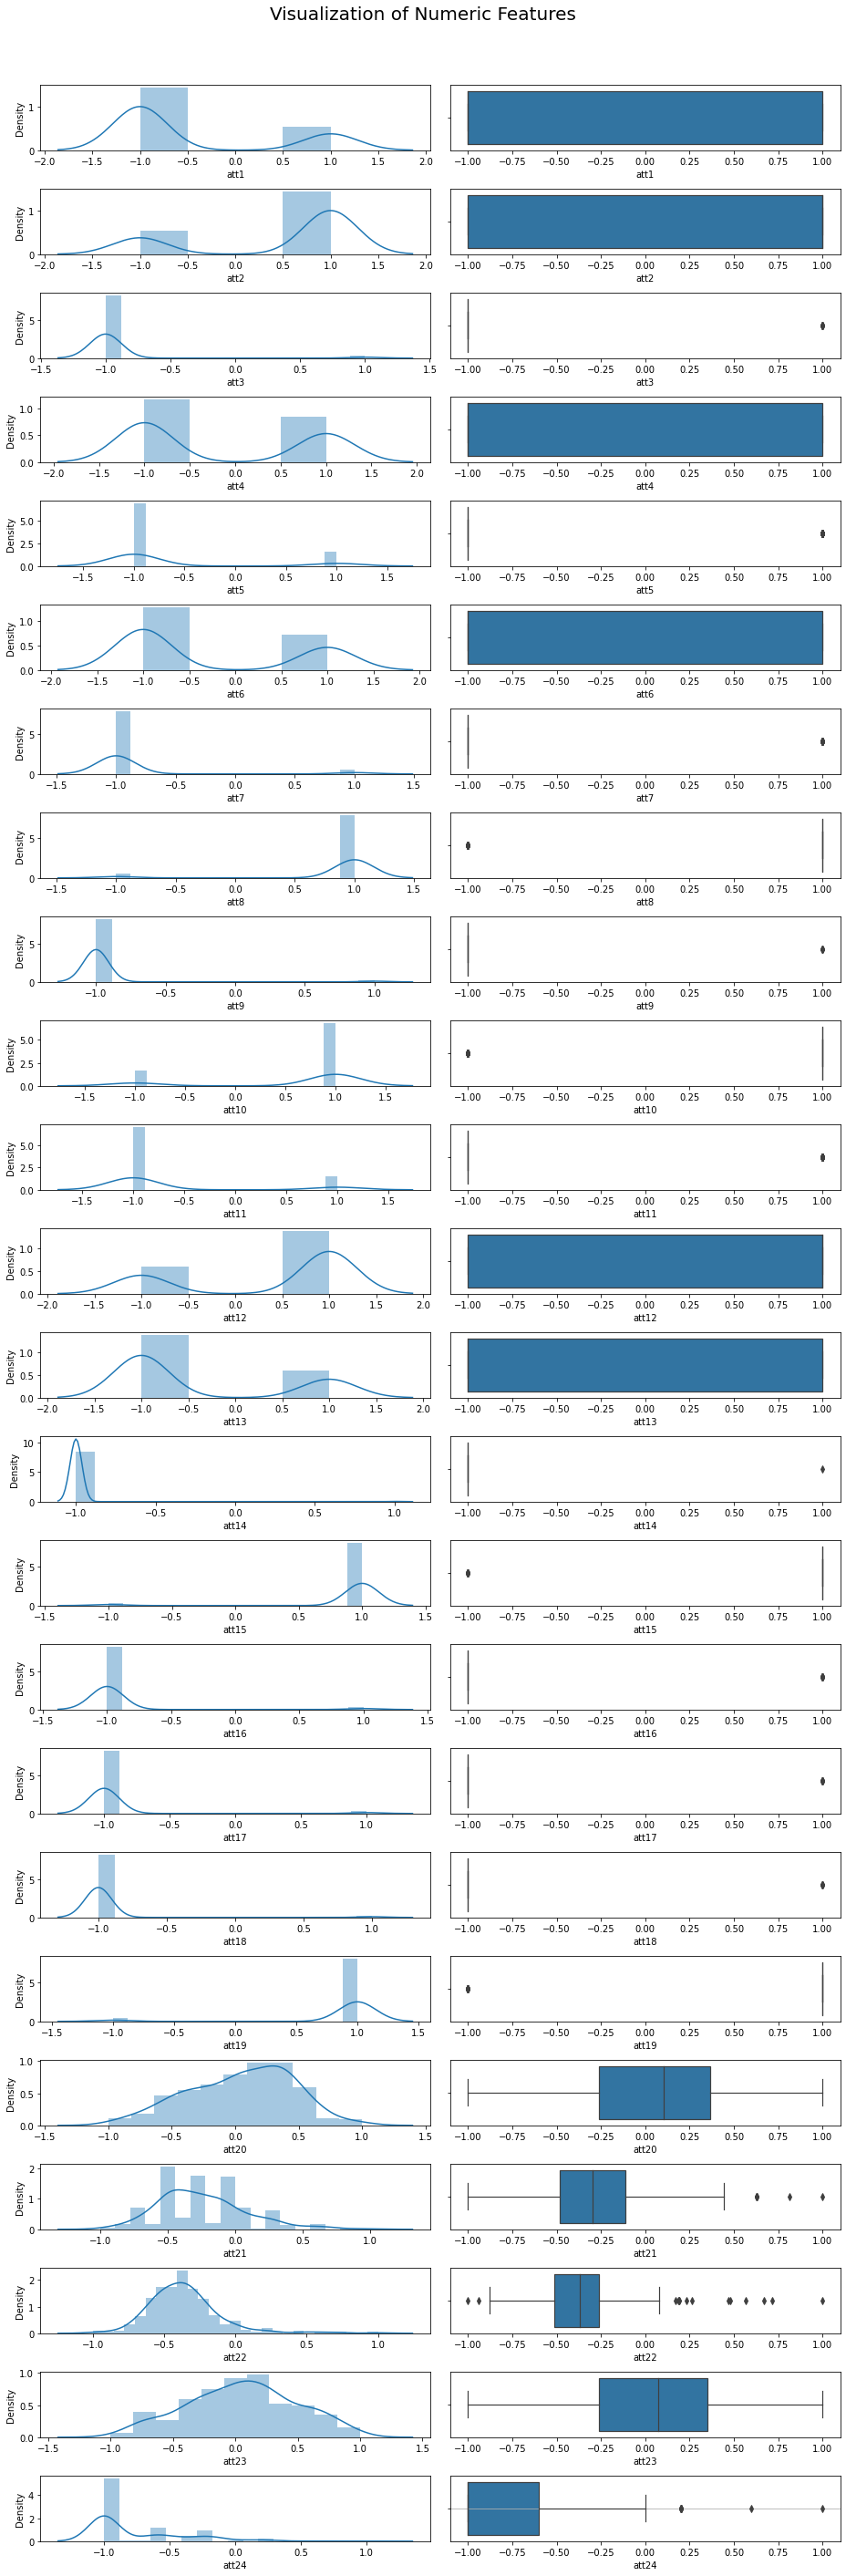

In [ ]:
import warnings
import statsmodels.api as sm
import scipy.stats as stats
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(24,2,figsize=(13,40))
for index,i in enumerate(df.drop('label',axis = 1).columns):
    sns.distplot(df[i],ax=ax[index,0])
    sns.boxplot(df[i],ax=ax[index,1], linewidth = 1.2)
    plt.grid()
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.suptitle("Visualization of Numeric Features",fontsize=20)

In [ ]:
df.label.value_counts(normalize=True)

0    0.638225
1    0.361775
Name: label, dtype: float64

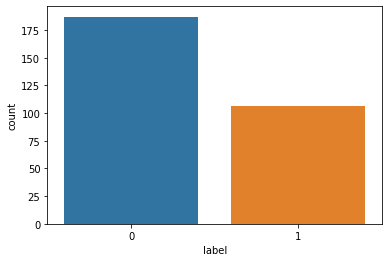

In [ ]:
sns.countplot(df['label'])

<Figure size 2160x1080 with 0 Axes>

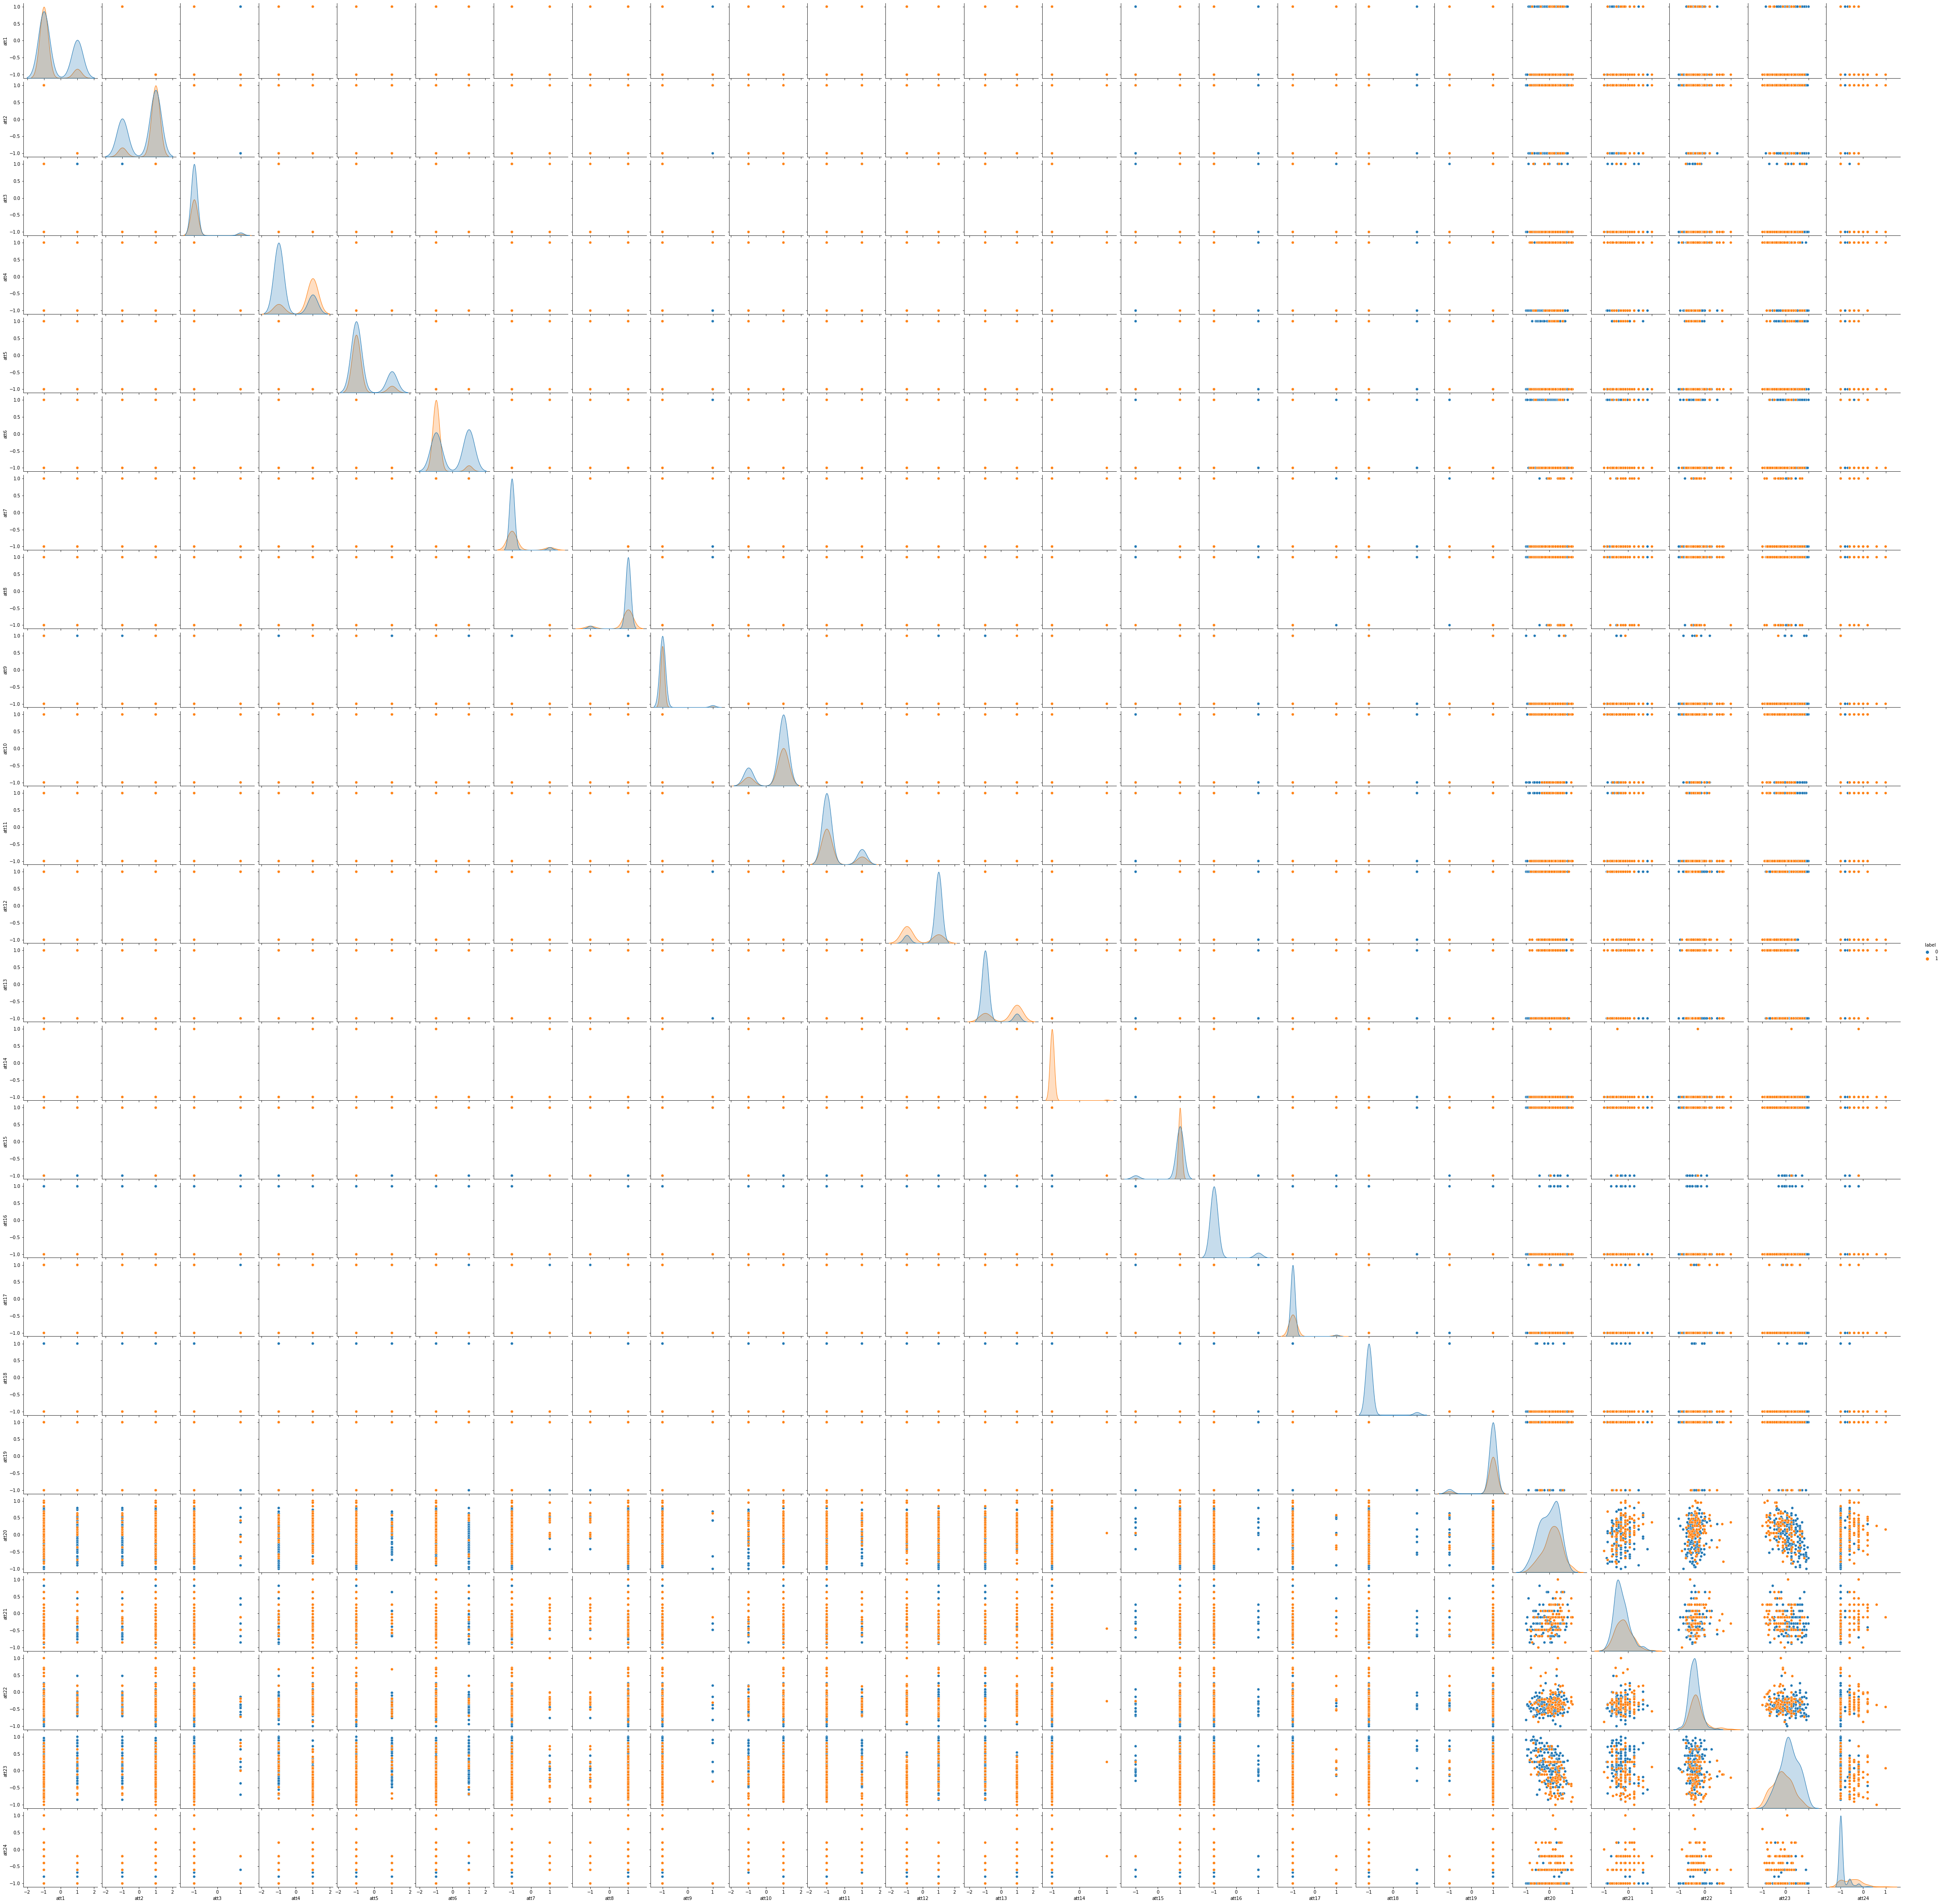

In [ ]:
plt.figure(figsize=(30,15))
sns.pairplot(data=df, hue='label')
plt.show()

DIVIDING THE DATASET INTO X(FEATURES) AND Y(TARGET)

In [ ]:
y=df['label']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
289    1
290    1
291    1
292    1
293    1
Name: label, Length: 293, dtype: int64

In [ ]:
col= ['att1','att2','att3','att4','att5','att6','att7','att8','att9','att10','att11','att12','att13','att14','att15','att16','att17','att18','att19','att20','att21','att22','att23','att24']

In [ ]:
col

['att1',
 'att2',
 'att3',
 'att4',
 'att5',
 'att6',
 'att7',
 'att8',
 'att9',
 'att10',
 'att11',
 'att12',
 'att13',
 'att14',
 'att15',
 'att16',
 'att17',
 'att18',
 'att19',
 'att20',
 'att21',
 'att22',
 'att23',
 'att24']

In [ ]:
x=df[col]

In [ ]:
x

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24
0,-1,1,-1,-1,-1,1,-1,1,1,-1,...,1,-1,-1,-1,1,-1.000000,-0.296296,-0.818533,0.907407,-1.0
1,-1,1,-1,-1,-1,1,-1,1,-1,1,...,1,-1,-1,-1,1,-0.947368,-0.481481,-0.389961,0.444444,-1.0
2,-1,1,-1,-1,-1,1,-1,1,-1,1,...,1,-1,-1,-1,1,-0.947368,-0.111111,-0.359657,0.629630,-1.0
3,1,-1,1,-1,-1,-1,-1,1,-1,-1,...,1,-1,1,-1,-1,-0.894737,0.444444,-0.413127,0.629630,-1.0
4,1,-1,-1,-1,-1,1,-1,1,-1,-1,...,1,-1,-1,-1,1,-0.842105,-0.851852,-0.482625,0.259259,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-1,1,-1,1,-1,-1,-1,1,-1,1,...,1,-1,-1,-1,1,0.263158,0.259259,-0.050193,-0.777778,0.0
290,1,-1,-1,-1,1,-1,-1,1,-1,-1,...,1,-1,-1,-1,1,0.368421,-0.296296,-0.193050,-0.666667,-1.0
291,-1,1,-1,1,-1,-1,1,-1,-1,1,...,1,-1,-1,-1,1,0.473684,0.166667,-0.007722,0.259259,0.2
292,1,-1,-1,-1,-1,1,-1,1,-1,1,...,1,-1,-1,-1,1,0.578947,0.629630,0.189189,-0.481481,-0.6


In [ ]:
x = (x - x.mean()) / x.std()

In [ ]:
# Add a 1 column to the start to allow vectorized gradient descent
x = np.c_[np.ones(x.shape[0]), x] 

SPLITTING THE DATA INTO TRAINING(60%), VALIDATION(20%) AND TESTING(20%)

In [ ]:
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)


In [ ]:
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

In [ ]:
print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)
print(x_test.shape), print(y_test.shape)

(175, 25)
(175,)
(59, 25)
(59,)
(59, 25)
(59,)


(None, None)

APPLYING LINEAR REGRESSION AND FITTING IT TO THE MODEL

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

PREDICTING A NEW DATA POINT

SLOPE VALUES OR COEFFICIENTS

In [ ]:
reg.coef_


array([ 0.00000000e+00, -1.29170222e+13, -1.29170222e+13,  9.58501949e+12,
        2.48856575e+13,  1.95509531e+13,  2.41794088e+13, -5.41866783e+12,
       -5.41866783e+12, -8.34307944e+12, -2.34724127e+13, -2.25071237e+13,
        2.55368015e+12,  2.55368015e+12,  1.27071608e+12,  4.48650123e+12,
        4.31818140e+12, -6.63645862e+12, -5.58181206e+12, -8.54519888e+12,
        4.68750000e-02, -3.29589844e-02,  3.77807617e-02, -1.34887695e-02,
        1.59667969e-01])

INTERCEPT VALUE

In [ ]:
reg.intercept_

0.3453382992777082

TRAINING PREDICTION

In [ ]:
train_pred = reg.predict(x_train)
train_pred

array([ 3.89830420e-02,  5.34100230e-01,  7.63238581e-01, -3.91419580e-02,
        8.68346045e-02,  1.68865855e-01,  8.41363581e-01,  3.37575276e-01,
        2.20623667e-01,  4.23276885e-01,  5.38983042e-01,  1.22553948e+00,
        3.49529917e-01,  8.48814795e-02,  9.11558135e-01,  6.24205420e-02,
        4.21795542e-01,  3.56365855e-01, -4.69544580e-02,  1.17546590e+00,
        6.24205420e-02,  9.44761260e-01,  2.62877295e-02,  7.39683135e-01,
        6.86948760e-01,  1.54217417e-01,  6.53981526e-01, -6.64857080e-02,
        7.00738581e-01,  1.83278401e-01,  4.45233042e-01,  9.60386260e-01,
       -3.67384903e-01, -1.64141958e-01,  4.11053355e-01,  8.10113581e-01,
        3.35858042e-01,  4.87486670e-02,  1.11248667e-01,  8.31715901e-01,
        2.03045542e-01,  4.10076792e-01,  2.09645589e-01, -6.25794580e-02,
        4.38658545e-02,  1.79608042e-01,  6.63983042e-01,  4.04217417e-01,
        1.01690894e+00, -2.07346599e-01,  1.57147105e-01,  2.04998667e-01,
        4.01287730e-01, -

TESTING PREDICTION

In [ ]:
y_pred= reg.predict(x_test)
print(y_pred)

[ 1.71795542e-01  7.37965901e-01 -8.60169580e-02  5.38794329e-01
  2.34295542e-01  7.86676081e-01  6.04674170e-02  1.08318980e-01
  7.61167510e-01  7.02330420e-02 -5.78204458e-01  2.73358042e-01
  3.28045542e-01  4.72576792e-01  7.88747151e-01 -9.43012398e-02
  6.01483042e-01  7.73304205e-03  1.55455420e-02  6.54099472e-01
  1.87420542e-01  3.72967417e-01  5.66326792e-01 -3.16721599e-01
  1.01483042e-01 -2.35169580e-02  9.87730010e-01  7.02330420e-02
  6.53981526e-01  1.14374412e+00  5.50701792e-01  3.12420542e-01
  9.99448760e-01  3.02301081e-01  1.56170542e-01  1.17108042e-01
 -7.82044580e-02  6.83278401e-01  5.46080420e-02  2.06951792e-01
  1.01483042e-01 -1.17982080e-02 -1.17982080e-02  1.10468162e+00
  7.80455420e-02  4.00311167e-01  8.39528401e-01  8.15855010e-01
  1.09295542e-01  4.02028401e-01 -7.89195795e-03  1.62029917e-01
  1.94517920e-02  3.11705420e-02  5.23358042e-01  1.79608042e-01
  7.82887776e-01 -7.94579532e-05  4.15936167e-01]


CALCULATING COST

In [ ]:
cost=mean_squared_error(y_test,y_pred)

In [ ]:
print(cost)

0.10065093709610481


Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. 

In [ ]:
reg.score(x_train, y_train)

0.5510616066154903

In [ ]:
reg.score(x_test, y_test)

0.5389922210111304

In [ ]:
y.shape

(293,)

In [ ]:
y_pred.shape

(59,)

PLOTING ACTUAL VS PREDICTED VALUES

Blue line for actual and black dots for predicted


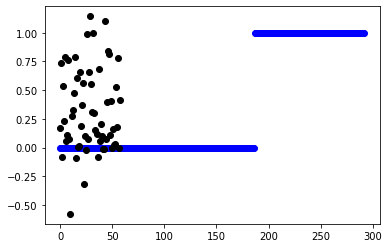

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0,293 )),y= y, color='blue')         
plt.scatter(x=list(range(0, 59)), y=y_pred, color='black')
print('Blue line for actual and black dots for predicted')
plt.show()



GRADIENT DESCENT

Defining Cost Function

In [4]:
def cost_function(X, y, theta):
    m = y.size
    error = np.dot(X, theta.T) - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

Defining Gradient Descent

In [5]:
def gradient_descent(X, y, theta, alpha, iters):
    cost_array = np.zeros(iters)
    m = y.size
    for i in range(iters):
        cost, error = cost_function(X, y, theta)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        cost_array[i] = cost
    return theta, cost_array

Ploting Error w.r.t Iterations

In [6]:
def plotChart(iterations, cost_num):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterations), cost_num, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Iterations')
    plt.style.use('fivethirtyeight')
    plt.show()

Implementing Gradient Decent 

Case:
Alpha=0.01
Iterations=1000
Standardization Normalized

With initial theta values of [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.], cost error is 0.19886363636363638


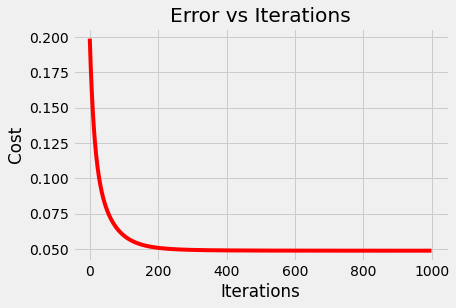

With final theta values of [ 3.75388022e-01 -2.53705096e-02  2.53705096e-02  1.12710107e-02
  8.36703995e-02 -2.02768718e-02 -7.40615444e-02  2.12581616e-02
 -2.12581616e-02 -1.39966178e-02  1.45765952e-02 -1.00159262e-02
 -5.38750794e-02  5.38750794e-02  3.58891627e-06  2.44028478e-02
 -2.53552712e-02  4.24931121e-02 -5.53365402e-02  3.14416128e-03
 -1.03778769e-02 -2.99069930e-02  5.34027074e-02  7.35256602e-04
  1.47249556e-01], cost error is 0.04878170739225177


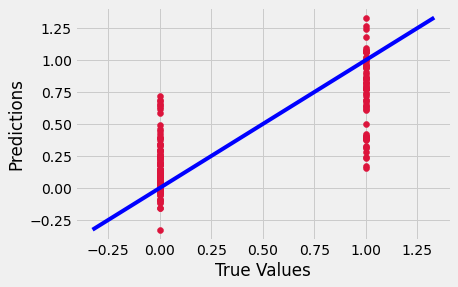

<Figure size 720x720 with 0 Axes>

In [11]:
data = pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/ML_Assignment1/Dataset_Normalized/Heart_Disease.csv')
# Extract data into X and y
X = data[['att1','att2','att3','att4','att5','att6','att7','att8','att9','att10','att11','att12','att13','att14','att15','att16','att17','att18','att19','att20','att21','att22','att23','att24']]
y = data['label']
# Normalize our features
X = (X - X.mean()) / X.std()
 # Add a 1 column to the start to allow vectorized gradient descent
X = np.c_[np.ones(X.shape[0]), X] 
#split

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# Set hyperparameters
alpha = 0.01
iterations = 1000

    # Initialize Theta Values to 0
theta = np.zeros(X.shape[1])
initial_cost, _ = cost_function(X_train, y_train, theta)

print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

    # Run Gradient Descent
theta, cost_num = gradient_descent(X_train, y_train, theta, alpha, iterations)

    # Display cost chart
plotChart(iterations, cost_num)

final_cost, _ = cost_function(X_train, y_train, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_train.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_train, pred, c='crimson')
p1 = max(max(pred), max(y_train))
p2 = min(min(pred), min(y_train))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')

plt.show()
    

Accuracy Train

In [12]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_train, pred), 2)*100,"%")

R2 score = 59.0 %


Prediction on Validation Set

With final theta values of [ 3.75388022e-01 -2.53705096e-02  2.53705096e-02  1.12710107e-02
  8.36703995e-02 -2.02768718e-02 -7.40615444e-02  2.12581616e-02
 -2.12581616e-02 -1.39966178e-02  1.45765952e-02 -1.00159262e-02
 -5.38750794e-02  5.38750794e-02  3.58891627e-06  2.44028478e-02
 -2.53552712e-02  4.24931121e-02 -5.53365402e-02  3.14416128e-03
 -1.03778769e-02 -2.99069930e-02  5.34027074e-02  7.35256602e-04
  1.47249556e-01], cost error is 0.05844999564548052


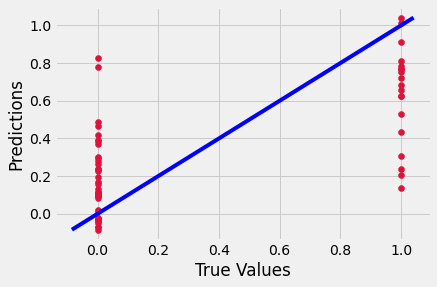

<Figure size 720x720 with 0 Axes>

In [13]:
final_cost, _ = cost_function(X_valid, y_valid, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_valid.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_valid, pred, c='crimson')
p1 = max(max(pred), max(y_valid))
p2 = min(min(pred), min(y_valid))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
plt.show()

Validation Accuracy

In [14]:
print("R2 score =", round(sm.r2_score(y_valid, pred), 2)*100,"%")

R2 score = 46.0 %


Case: 
alpha = 0.001, Iterations=2000, Normalization

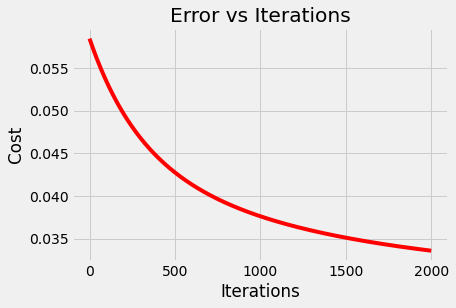

With final theta values of [ 0.3540018  -0.03833734  0.03833734  0.08419722  0.02326585  0.02328435
 -0.07595742 -0.00202742  0.00202742 -0.01091504 -0.02809477  0.03334597
 -0.05906591  0.05906591  0.00125086  0.06638867 -0.06934496  0.01761737
 -0.05521624  0.02238398  0.02648875  0.01175576 -0.0196241   0.00396416
  0.22929694], cost error is 0.033600403848169


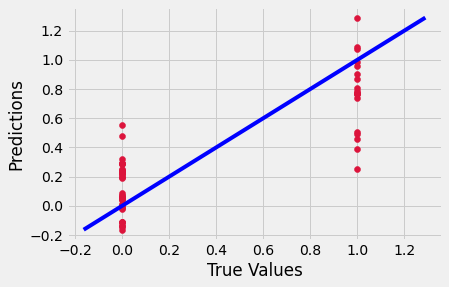

<Figure size 720x720 with 0 Axes>

In [15]:
alpha = 0.001
iterations = 2000
theta, cost_num = gradient_descent(X_valid, y_valid, theta, alpha, iterations)

    # Display cost chart
plotChart(iterations, cost_num)

final_cost, _ = cost_function(X_valid, y_valid, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_valid.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_valid, pred, c='crimson')
p1 = max(max(pred), max(y_valid))
p2 = min(min(pred), min(y_valid))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
plt.show()

Training Accuracy

In [18]:
print("R2 score =", round(sm.r2_score(y_valid, pred), 2)*100)

R2 score = 69.0


Case:
alpha=0.1
Iterations = 500
Normalization

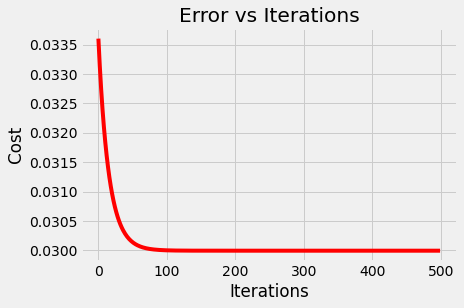

With final theta values of [ 0.34392958 -0.02724472  0.02724472  0.15690378 -0.02621397  0.03014399
 -0.05939249  0.002836   -0.002836   -0.00946371 -0.01862676  0.02293355
 -0.07502947  0.07502947  0.00183828  0.11052587 -0.11537574  0.00172881
 -0.03801823  0.02348975  0.04794217 -0.00817541 -0.07735404 -0.01647891
  0.29231294], cost error is 0.029996073669170377


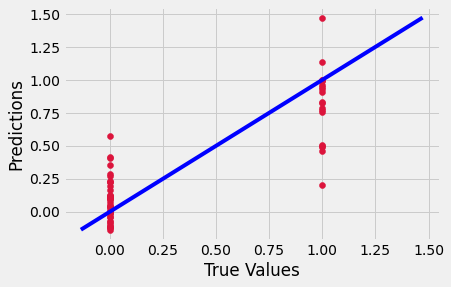

<Figure size 720x720 with 0 Axes>

In [19]:
alpha = 0.1
iterations = 500
theta, cost_num = gradient_descent(X_valid, y_valid, theta, alpha, iterations)

    # Display cost chart
plotChart(iterations, cost_num)

final_cost, _ = cost_function(X_valid, y_valid, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_valid.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_valid, pred, c='crimson')
p1 = max(max(pred), max(y_valid))
p2 = min(min(pred), min(y_valid))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
plt.show()

Training Accuracy

In [ ]:
print("R2 score =", round(sm.r2_score(y_train, pred), 2)*100)

R2 score = 63.0


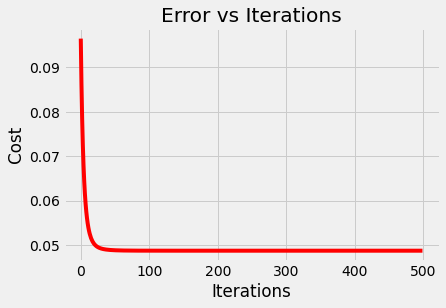

With final theta values of [ 3.75691538e-01 -2.52799776e-02  2.52799776e-02  1.11094002e-02
  8.37850431e-02 -1.98145164e-02 -7.44883098e-02  2.12210439e-02
 -2.12210439e-02 -1.40934920e-02  1.45208261e-02 -9.92186419e-03
 -5.20868833e-02  5.20868833e-02  7.52754601e-06  2.49188445e-02
 -2.58925434e-02  4.21642611e-02 -5.51458861e-02  3.27501607e-03
 -1.03146396e-02 -3.02042331e-02  5.35551001e-02  1.03753882e-03
  1.51533683e-01], cost error is 0.04877760502936799


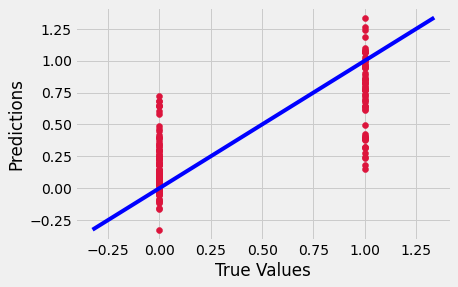

<Figure size 720x720 with 0 Axes>

In [20]:
alpha = 0.1
iterations = 500
theta, cost_num = gradient_descent(X_train, y_train, theta, alpha, iterations)

    # Display cost chart
plotChart(iterations, cost_num)

final_cost, _ = cost_function(X_train, y_train, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_train.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_train, pred, c='crimson')
p1 = max(max(pred), max(y_train))
p2 = min(min(pred), min(y_train))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
plt.show()

Predicting Model on test Set

With final theta values of [ 3.75691538e-01 -2.52799776e-02  2.52799776e-02  1.11094002e-02
  8.37850431e-02 -1.98145164e-02 -7.44883098e-02  2.12210439e-02
 -2.12210439e-02 -1.40934920e-02  1.45208261e-02 -9.92186419e-03
 -5.20868833e-02  5.20868833e-02  7.52754601e-06  2.49188445e-02
 -2.58925434e-02  4.21642611e-02 -5.51458861e-02  3.27501607e-03
 -1.03146396e-02 -3.02042331e-02  5.35551001e-02  1.03753882e-03
  1.51533683e-01], cost error is 0.05606602432856608


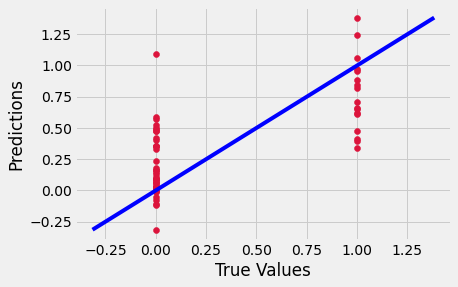

<Figure size 720x720 with 0 Axes>

In [21]:
final_cost, _ = cost_function(X_test, y_test, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_test.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_test, pred, c='crimson')
p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
plt.show()

Test Accuracy

In [22]:
print("R2 score =", round(sm.r2_score(y_test, pred),2)*100)

R2 score = 45.0


Case: Without Normalization, Alpha=0.01 , iterations = 1000

With initial theta values of [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.], cost error is 0.18181818181818182


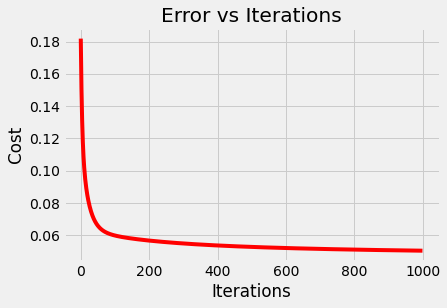

With final theta values of [ 0.09733978 -0.05605911  0.05605911  0.03723043  0.02310407 -0.12319432
 -0.13181974  0.03668233 -0.03668233 -0.09324338  0.01941511 -0.0235115
 -0.08885306  0.08885306 -0.06270011  0.06155238 -0.09619205  0.07448345
 -0.16362203 -0.00820119 -0.02058188 -0.02279275  0.07594208  0.02062579
  0.15222572], cost error is 0.050343520176423136


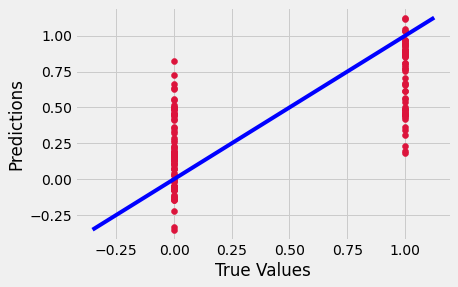

<Figure size 720x720 with 0 Axes>

In [23]:
data = pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/ML_Assignment1/Dataset_Normalized/Heart_Disease.csv')
# Extract data into X and y
X = data[['att1','att2','att3','att4','att5','att6','att7','att8','att9','att10','att11','att12','att13','att14','att15','att16','att17','att18','att19','att20','att21','att22','att23','att24']]
y = data['label']
# Normalize our features
# X = (X - X.mean()) / X.std()
 # Add a 1 column to the start to allow vectorized gradient descent
X = np.c_[np.ones(X.shape[0]), X] 
#split

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# Set hyperparameters
alpha = 0.01
iterations = 1000

    # Initialize Theta Values to 0
theta = np.zeros(X.shape[1])
initial_cost, _ = cost_function(X_train, y_train, theta)

print('With initial theta values of {0}, cost error is {1}'.format(theta, initial_cost))

    # Run Gradient Descent
theta, cost_num = gradient_descent(X_train, y_train, theta, alpha, iterations)

    # Display cost chart
plotChart(iterations, cost_num)

final_cost, _ = cost_function(X_train, y_train, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_train.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_train, pred, c='crimson')
p1 = max(max(pred), max(y_train))
p2 = min(min(pred), min(y_train))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')

plt.show()
    

Training Accuracy

In [24]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_train, pred), 2)*100,"%")

R2 score = 56.00000000000001 %


Prediction on Validation set

With final theta values of [ 0.09733978 -0.05605911  0.05605911  0.03723043  0.02310407 -0.12319432
 -0.13181974  0.03668233 -0.03668233 -0.09324338  0.01941511 -0.0235115
 -0.08885306  0.08885306 -0.06270011  0.06155238 -0.09619205  0.07448345
 -0.16362203 -0.00820119 -0.02058188 -0.02279275  0.07594208  0.02062579
  0.15222572], cost error is 0.06755705973063131


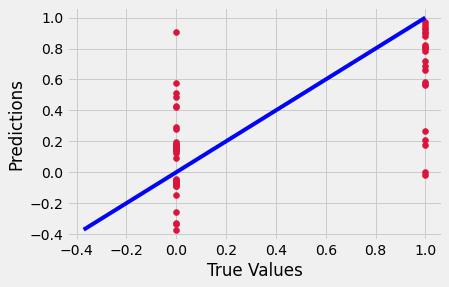

<Figure size 720x720 with 0 Axes>

In [25]:
final_cost, _ = cost_function(X_valid, y_valid, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_valid.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_valid, pred, c='crimson')
p1 = max(max(pred), max(y_valid))
p2 = min(min(pred), min(y_valid))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
plt.show()

Validation Accuracy

In [26]:
print("R2 score =", round(sm.r2_score(y_valid, pred), 2)*100,"%")

R2 score = 43.0 %


Case:
alpha=0.001,
Iterations=2000,
Without Normalization

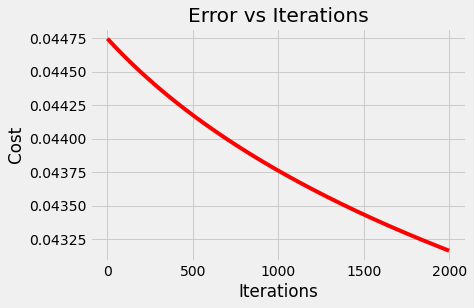

With final theta values of [ 0.12842957  0.04091173 -0.04091173  0.00614064 -0.00273062 -0.07278067
 -0.1874885   0.06900438 -0.06900438 -0.09506669  0.00264329 -0.03600617
 -0.11677935  0.11677935 -0.09378991  0.05732525 -0.09196492  0.04339365
 -0.22914034  0.05731711  0.02898693 -0.00232776  0.08950362 -0.02706501
  0.17325993], cost error is 0.04316223828095331


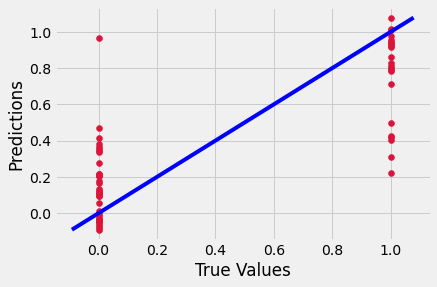

<Figure size 720x720 with 0 Axes>

In [28]:
alpha = 0.001
iterations = 2000
theta, cost_num = gradient_descent(X_valid, y_valid, theta, alpha, iterations)

    # Display cost chart
plotChart(iterations, cost_num)

final_cost, _ = cost_function(X_valid, y_valid, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_valid.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_valid, pred, c='crimson')
p1 = max(max(pred), max(y_valid))
p2 = min(min(pred), min(y_valid))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
plt.show()

Tunning accuracy

In [30]:
print("R2 score =", round(sm.r2_score(y_valid, pred), 2)*100,"%")

R2 score = 64.0 %


Case: alpha = 0.1,
iterations = 500, Without normalization

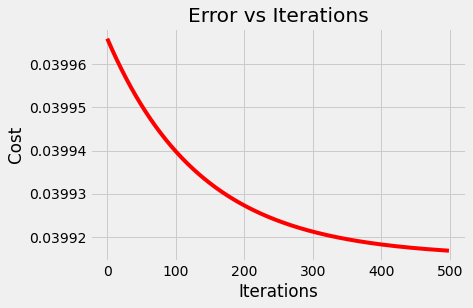

With final theta values of [ 0.13033419  0.04153246 -0.04153246  0.00423603 -0.04888685 -0.04680408
 -0.16921347  0.11087384 -0.11087384 -0.10863343  0.03598959 -0.05769035
 -0.1247104   0.1247104  -0.09569452  0.06981732 -0.10445699  0.04148904
 -0.34258509  0.17076186  0.08272575 -0.00044898  0.34586234 -0.06805564
  0.32509929], cost error is 0.03991680689358054


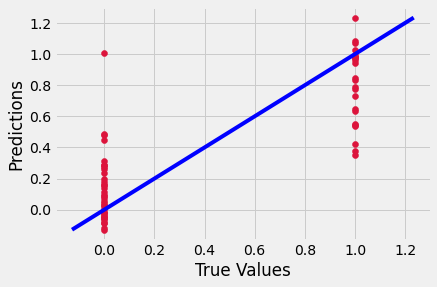

<Figure size 720x720 with 0 Axes>

In [36]:
alpha = 0.1
iterations = 500
theta, cost_num = gradient_descent(X_valid, y_valid, theta, alpha, iterations)

    # Display cost chart
plotChart(iterations, cost_num)

final_cost, _ = cost_function(X_valid, y_valid, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_valid.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_valid, pred, c='crimson')
p1 = max(max(pred), max(y_valid))
p2 = min(min(pred), min(y_valid))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
plt.show()

Tunning  Accuracy (best)

In [33]:
print("R2 score =", round(sm.r2_score(y_valid, pred), 2)*100,"%")

R2 score = 66.0 %


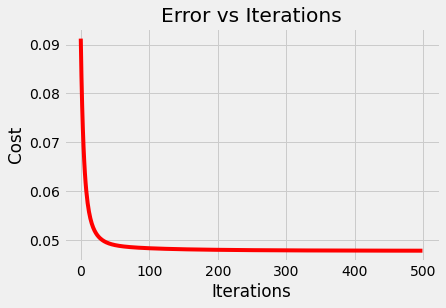

With final theta values of [ 0.15843109 -0.0544486   0.0544486   0.00610346 -0.01054295 -0.14529626
 -0.16712643  0.03117935 -0.03117935 -0.09794949 -0.00953318 -0.05094841
 -0.0571097   0.0571097  -0.03647409  0.03884123 -0.16079823  0.08724415
 -0.22887922 -0.01679602 -0.00668442 -0.0601845   0.19820056  0.05235209
  0.3899074 ], cost error is 0.04786380184228997


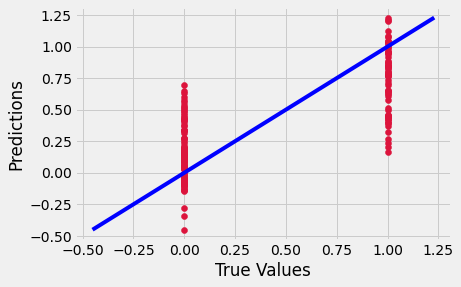

<Figure size 720x720 with 0 Axes>

In [37]:
alpha = 0.1
iterations = 500
theta, cost_num = gradient_descent(X_train, y_train, theta, alpha, iterations)

    # Display cost chart
plotChart(iterations, cost_num)

final_cost, _ = cost_function(X_train, y_train, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_train.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_train, pred, c='crimson')
p1 = max(max(pred), max(y_train))
p2 = min(min(pred), min(y_train))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
plt.show()

Test Prediction

With final theta values of [ 0.15843109 -0.0544486   0.0544486   0.00610346 -0.01054295 -0.14529626
 -0.16712643  0.03117935 -0.03117935 -0.09794949 -0.00953318 -0.05094841
 -0.0571097   0.0571097  -0.03647409  0.03884123 -0.16079823  0.08724415
 -0.22887922 -0.01679602 -0.00668442 -0.0601845   0.19820056  0.05235209
  0.3899074 ], cost error is 0.05401590255778727


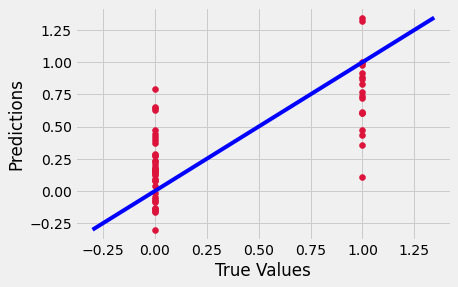

<Figure size 720x720 with 0 Axes>

In [38]:
final_cost, _ = cost_function(X_test, y_test, theta)
print('With final theta values of {0}, cost error is {1}'.format(theta, final_cost))

pred = X_test.dot(theta)
fig,ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(y_test, pred, c='crimson')
p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
ax.plot([p1, p2], [p1, p2], 'b-')
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
plt.show()

Test Accuracy

In [39]:
print("R2 score =", round(sm.r2_score(y_test, pred), 2)*100,"%")

R2 score = 51.0 %
